In [1]:
# Imports 
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Question 1
a. Evaluate the data types in the dataset and convert where necessary.

In [2]:
# Data type evaluation
df = pd.read_csv(r"Lab02_data file.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 661 entries, 0 to 660
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   User_ID                    661 non-null    int64  
 1   Gender                     649 non-null    object 
 2   Age                        653 non-null    object 
 3   Marital_Status             659 non-null    object 
 4   Monthly_Website_Activity   656 non-null    float64
 5   Browsed_Electronics_12Mo   656 non-null    object 
 6   Bought_Electronics_12Mo    656 non-null    object 
 7   Bought_Digital_Media_12Mo  646 non-null    object 
 8   Bought_Digital_Books       656 non-null    object 
 9   Payment_Method             645 non-null    object 
 10  eReader_Adoption           650 non-null    object 
 11  Average_Spend_Monthly      636 non-null    float64
dtypes: float64(2), int64(1), object(9)
memory usage: 62.1+ KB


In [3]:
# Determining the dataframe's size
num_of_rows = len(df)
print(f"The number of rows is: {num_of_rows}")
if num_of_rows >= 1_000:
    print("This dataset is large")
print("This dataset is small")

The number of rows is: 661
This dataset is small


In [4]:
# Converting ALL numerical columns
numerical_columns = ["Age", "Monthly_Website_Activity", "Average_Spend_Monthly"]
for col in numerical_columns:
    # First convert to numeric while preserving NaN
    df[col] = pd.to_numeric(df[col], errors='coerce')
    
    if col in ["Age", "Monthly_Website_Activity"]:
        # Round floats before converting to Int64
        df[col] = df[col].round().astype('Int64')
    elif col == "Average_Spend_Monthly":
        df[col] = df[col].astype(float)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 661 entries, 0 to 660
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   User_ID                    661 non-null    int64  
 1   Gender                     649 non-null    object 
 2   Age                        651 non-null    Int64  
 3   Marital_Status             659 non-null    object 
 4   Monthly_Website_Activity   656 non-null    Int64  
 5   Browsed_Electronics_12Mo   656 non-null    object 
 6   Bought_Electronics_12Mo    656 non-null    object 
 7   Bought_Digital_Media_12Mo  646 non-null    object 
 8   Bought_Digital_Books       656 non-null    object 
 9   Payment_Method             645 non-null    object 
 10  eReader_Adoption           650 non-null    object 
 11  Average_Spend_Monthly      636 non-null    float64
dtypes: Int64(2), float64(1), int64(1), object(8)
memory usage: 63.4+ KB


In [5]:
# Converting all non-numeric columns
non_numerical_columns = [
    "Gender",
    "Marital_Status",
    "Browsed_Electronics_12Mo",
    "Bought_Electronics_12Mo",
    "Bought_Digital_Media_12Mo",
    "Bought_Digital_Books",
    "Payment_Method",
    "eReader_Adoption"
]

for col in non_numerical_columns:
    # Convert to string while preserving NaN values
    df[col] = df[col].astype('string')
    
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 661 entries, 0 to 660
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   User_ID                    661 non-null    int64  
 1   Gender                     649 non-null    string 
 2   Age                        651 non-null    Int64  
 3   Marital_Status             659 non-null    string 
 4   Monthly_Website_Activity   656 non-null    Int64  
 5   Browsed_Electronics_12Mo   656 non-null    string 
 6   Bought_Electronics_12Mo    656 non-null    string 
 7   Bought_Digital_Media_12Mo  646 non-null    string 
 8   Bought_Digital_Books       656 non-null    string 
 9   Payment_Method             645 non-null    string 
 10  eReader_Adoption           650 non-null    string 
 11  Average_Spend_Monthly      636 non-null    float64
dtypes: Int64(2), float64(1), int64(1), string(8)
memory usage: 63.4 KB


In [6]:
# Converting all non-numeric columns
non_numerical_columns = [
    "Gender",
    "Marital_Status",
    "Browsed_Electronics_12Mo",
    "Bought_Electronics_12Mo",
    "Bought_Digital_Media_12Mo",
    "Bought_Digital_Books",
    "Payment_Method",
    "eReader_Adoption"
]

for col in non_numerical_columns:
    # Replace 0 with NaN first, then convert to string
    df[col] = df[col].replace(0, np.nan).astype('string')
    
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 661 entries, 0 to 660
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   User_ID                    661 non-null    int64  
 1   Gender                     649 non-null    string 
 2   Age                        651 non-null    Int64  
 3   Marital_Status             659 non-null    string 
 4   Monthly_Website_Activity   656 non-null    Int64  
 5   Browsed_Electronics_12Mo   656 non-null    string 
 6   Bought_Electronics_12Mo    656 non-null    string 
 7   Bought_Digital_Media_12Mo  646 non-null    string 
 8   Bought_Digital_Books       656 non-null    string 
 9   Payment_Method             645 non-null    string 
 10  eReader_Adoption           650 non-null    string 
 11  Average_Spend_Monthly      636 non-null    float64
dtypes: Int64(2), float64(1), int64(1), string(8)
memory usage: 63.4 KB


# B - Missing Values for each feature

In [7]:
print(" \nCount total NaN at each column in a DataFrame : \n\n", df.isnull().sum())

 
Count total NaN at each column in a DataFrame : 

 User_ID                       0
Gender                       12
Age                          10
Marital_Status                2
Monthly_Website_Activity      5
Browsed_Electronics_12Mo      5
Bought_Electronics_12Mo       5
Bought_Digital_Media_12Mo    15
Bought_Digital_Books          5
Payment_Method               16
eReader_Adoption             11
Average_Spend_Monthly        25
dtype: int64


# C - Outliers for each feature

In [8]:
# Numerical Columns

# Checking if they are normally distributed
for col in numerical_columns:
    data = df[col].dropna()
    
    # Shapiro-Wilk Test
    stat, p_value = stats.shapiro(data)
    print(f"\nShapiro-Wilk Test for {col}:")
    print(f"Statistic: {stat:.4f}, p-value: {p_value:.4f}")
    print("Normal distribution" if p_value > 0.05 else "Not normal distribution")
    
    # Calculate Skewness and Kurtosis
    skew = data.skew()
    kurt = data.kurtosis()
    print(f"Skewness: {skew:.4f}")
    print(f"Kurtosis: {kurt:.4f}")


Shapiro-Wilk Test for Age:
Statistic: 0.0884, p-value: 0.0000
Not normal distribution
Skewness: 22.7436
Kurtosis: 547.9868

Shapiro-Wilk Test for Monthly_Website_Activity:
Statistic: 0.6813, p-value: 0.0000
Not normal distribution
Skewness: 2.3932
Kurtosis: 5.6090

Shapiro-Wilk Test for Average_Spend_Monthly:
Statistic: 0.0180, p-value: 0.0000
Not normal distribution
Skewness: 25.2151
Kurtosis: 635.8666


In [9]:
# Since they are not normally distributed we would use IQR method
# Finding outliers using IQR method
outliers_dict = {}

for col in numerical_columns:
    # Calculate Q1, Q3, and IQR
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    # Calculate bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Find outliers
    outliers = df[col][(df[col] < lower_bound) | (df[col] > upper_bound)].tolist()
    outliers_dict[col] = outliers

# Print results
for col, outliers in outliers_dict.items():
    print(f"\n{col} outliers:")
    print(f"Number of outliers: {len(outliers)}")
    print(f"Outlier values: {outliers[:5]}{'...' if len(outliers) > 5 else ''}")


Age outliers:
Number of outliers: 3
Outlier values: [666, 2445, 123]

Monthly_Website_Activity outliers:
Number of outliers: 53
Outlier values: [75, 58, 88, 60, 85]...

Average_Spend_Monthly outliers:
Number of outliers: 5
Outlier values: [1004.202, 940.239, 444.973, 3249.468, 345630.771]


In [10]:
# Analyzing categorical outliers/anomalies
categorical_outliers = {}

for col in non_numerical_columns:
    # Get value counts and calculate percentage
    value_counts = df[col].value_counts()
    value_percentages = (value_counts / len(df)) * 100
    
    # Find rare categories (less than 1% of data)
    rare_categories = value_percentages[value_percentages < 1]
    
    # Find unexpected values (e.g., special characters, numbers in string fields)
    unexpected_values = df[col][df[col].str.contains(r'[^a-zA-Z\s]', na=False)]
    
    # Store results
    categorical_outliers[col] = {
        'rare_categories': rare_categories.to_dict(),
        'unexpected_values': unexpected_values.unique().tolist()
    }

# Print results
for col, results in categorical_outliers.items():
    print(f"\n{col}:")
    print("Rare categories (< 1%):")
    for category, percentage in results['rare_categories'].items():
        print(f"  - {category}: {percentage:.2f}%")
    print("Unexpected values:")
    print(f"  {results['unexpected_values']}")


Gender:
Rare categories (< 1%):
Unexpected values:
  []

Marital_Status:
Rare categories (< 1%):
Unexpected values:
  []

Browsed_Electronics_12Mo:
Rare categories (< 1%):
Unexpected values:
  []

Bought_Electronics_12Mo:
Rare categories (< 1%):
  - ?: 0.30%
Unexpected values:
  ['?']

Bought_Digital_Media_12Mo:
Rare categories (< 1%):
Unexpected values:
  []

Bought_Digital_Books:
Rare categories (< 1%):
  - ?: 0.30%
Unexpected values:
  ['?']

Payment_Method:
Rare categories (< 1%):
Unexpected values:
  []

eReader_Adoption:
Rare categories (< 1%):
  - 999: 0.61%
  - 678: 0.15%
  - 8890: 0.15%
Unexpected values:
  ['999', '678', '8890']


# Noise in each feature

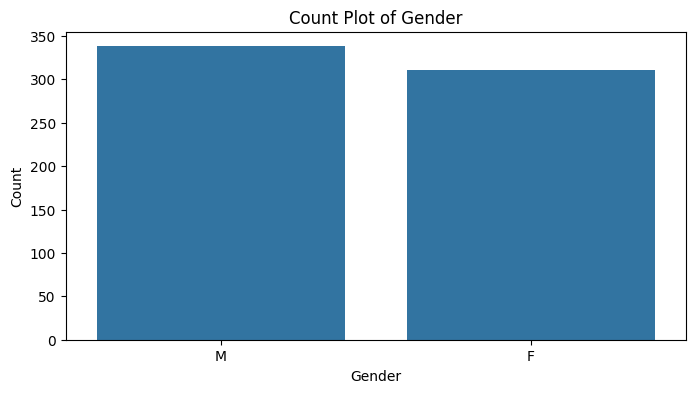

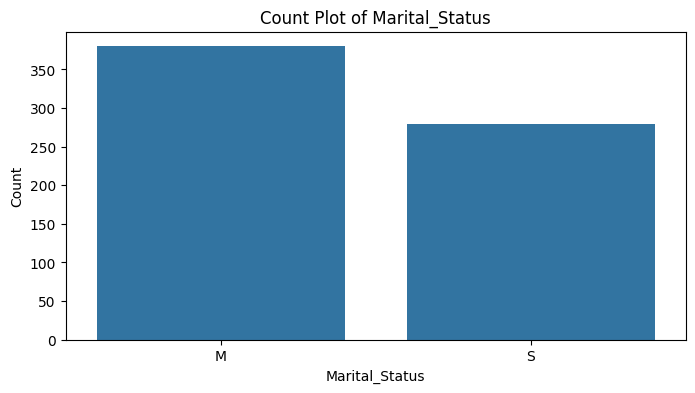

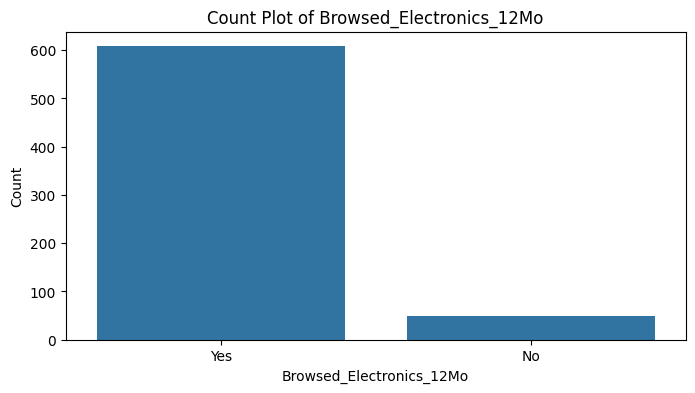

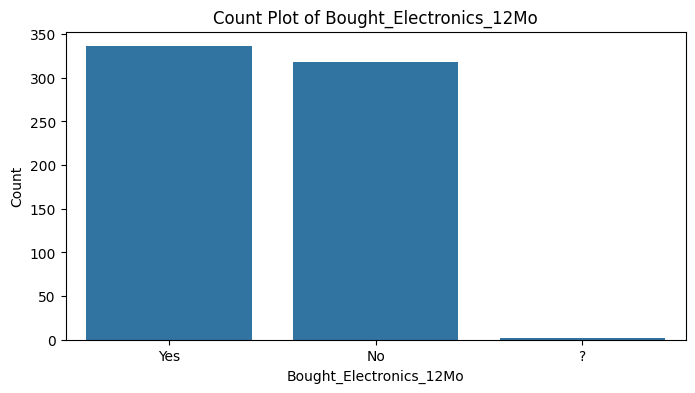

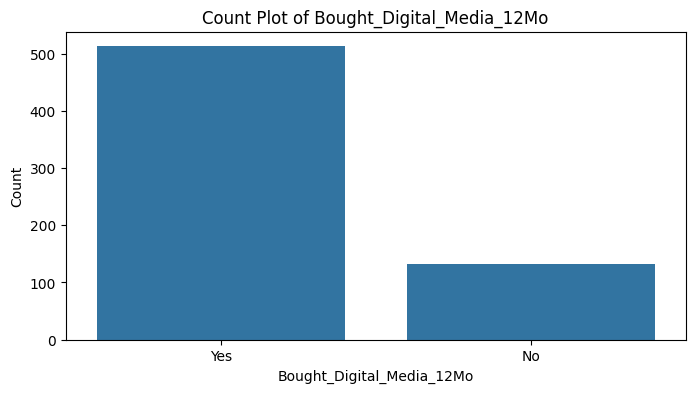

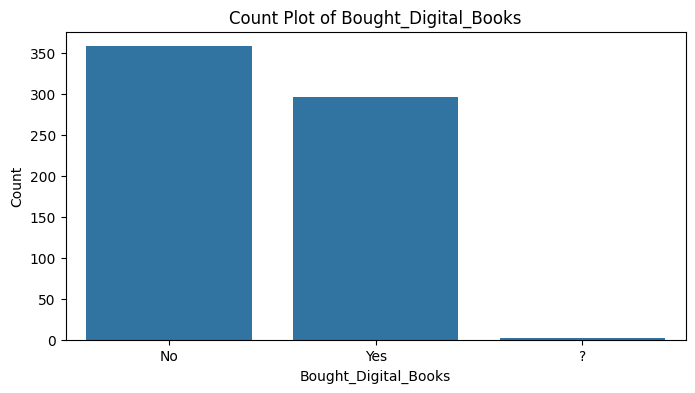

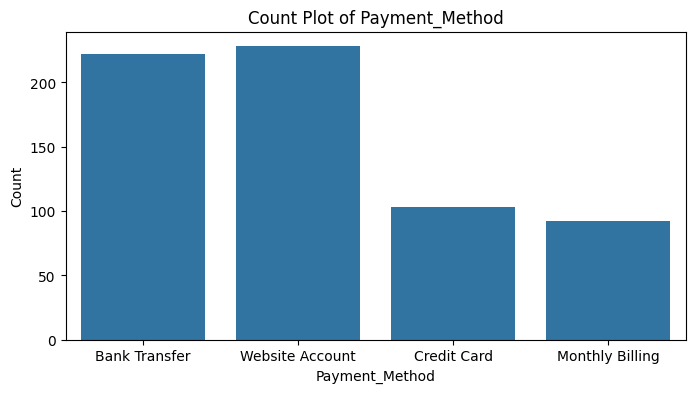

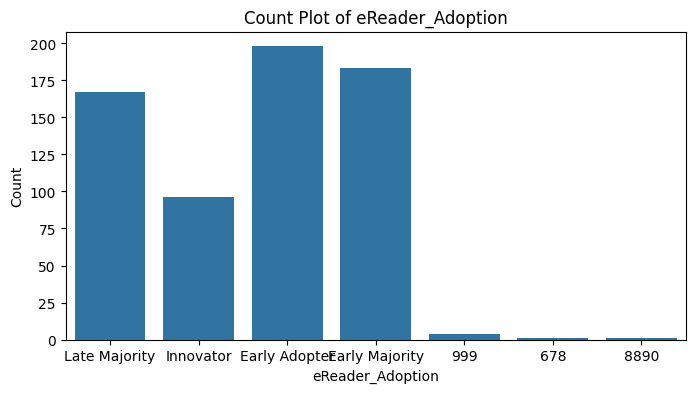

In [11]:
# We now establish all of the noise within each feature graphically 
# Count plot for a categorical feature (e.g., Gender)
for col in non_numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, data=df)
    plt.title(f'Count Plot of {col}')
    plt.xlabel(f'{col}')
    plt.ylabel('Count')
    plt.show()

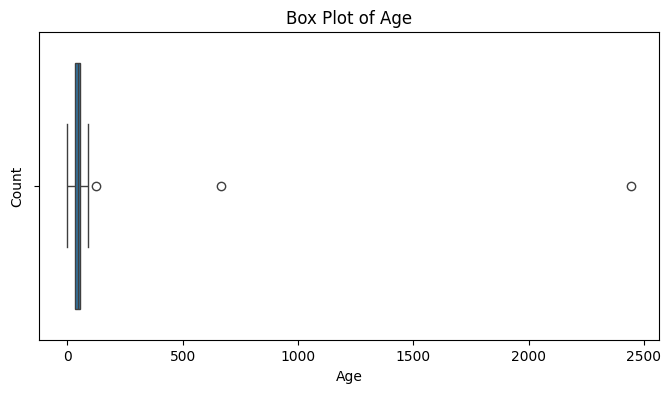

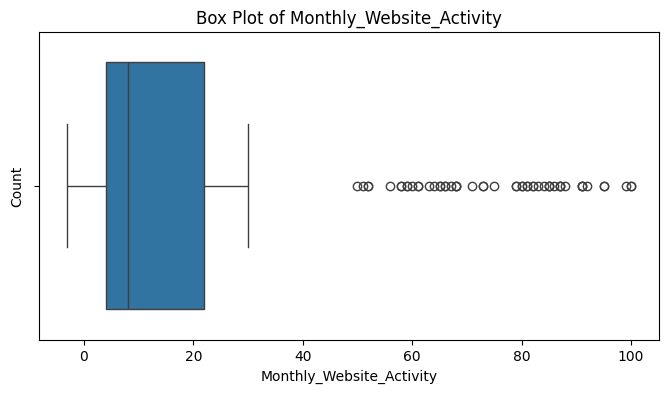

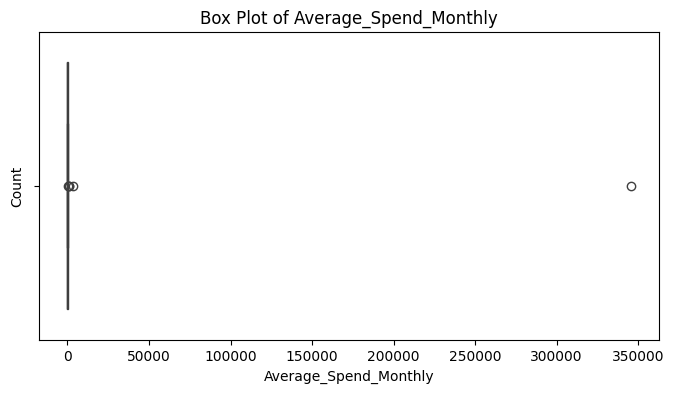

In [12]:
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=col, data=df)
    plt.title(f'Box Plot of {col}')
    plt.xlabel(f'{col}')
    plt.ylabel('Count')
    plt.show()
    

# q1e
- Convert Age to an ordinal measurement called agegroups with values below 30 classified as “Youth”, those between 30 and 40 “Adult”, 40 to 50 are “MiddleAged” and those over 50 are “Senior”.

In [13]:
bins = [0, 30, 40, 50, float('inf')]
labels = ["Youth", "Adult", "MiddleAged", "Senior"]
df['agegroups'] = pd.cut(df['Age'], bins=bins, labels=labels)
df['agegroups']

0          Senior
1           Youth
2           Youth
3      MiddleAged
4           Youth
          ...    
656    MiddleAged
657         Adult
658         Youth
659        Senior
660        Senior
Name: agegroups, Length: 661, dtype: category
Categories (4, object): ['Youth' < 'Adult' < 'MiddleAged' < 'Senior']

# Question 2
- a. Determine the strategy and apply fixes for missing values for each feature

- Since the distributions are non-normal, using the mean is not be the best approach.
    - using the median or mode as a replacement value
    - The median is a more robust measure of central tendency that is less affected by outliers, while the mode is the most frequently occurring value.

## Non-numerical approach
- freq_threshold = 0.05: Sets a 5% threshold to determine what constitutes a "frequent" value
- value_counts(normalize=True): Calculates the proportion (0 to 1) of each unique value in the column
- value_counts > freq_threshold: Filters to only values that appear in more than 5% of the data
- .index[0]: Takes the first (most frequent) value that meets this threshold
- fillna(): Replaces all NaN values with this frequent value

- Mode alone it is simple and effective, but it can be biased towards the most common category.
- This is a more sophisticated approach than simply using the mode alone, as it ensures we're only filling with values that are common in the dataset. 

In [14]:
# First convert strings to numeric while handling errors
for col in numerical_columns:
    # Convert to numeric, setting invalid values to NaN
    df[col] = pd.to_numeric(df[col], errors='coerce')
    
    # Now fill NaN values with median
    df[col].fillna(df[col].median(), inplace=True)

# For categorical columns
freq_threshold = 0.05  # 5% frequency threshold
for col in non_numerical_columns:
    value_counts = df[col].value_counts(normalize=True)
    most_frequent = value_counts[value_counts > freq_threshold].index[0]
    df[col].fillna(most_frequent, inplace=True)

C:\Users\Jonathan\AppData\Local\Temp\ipykernel_24528\2161111163.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\Jonathan\AppData\Local\Temp\ipykernel_24528\2161111163.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

# Determine the strategy and apply fixes for Outliers for each feature.

In [15]:
for col in numerical_columns:
    upper_bound = df[col].mean() + (2 * df[col].std())
    lower_bound = df[col].mean() - (2 * df[col].std())
    df = df[(df[col] < upper_bound) & (df[col] > lower_bound)]
    
    

for col in non_numerical_columns:
    mode = df[col].mode()[0]
    df[col].fillna(mode, inplace=True)
    print("\n####", df[col].value_counts())


#### Gender
M    327
F    282
Name: count, dtype: Int64

#### Marital_Status
M    347
S    262
Name: count, dtype: Int64

#### Browsed_Electronics_12Mo
Yes    565
No      44
Name: count, dtype: Int64

#### Bought_Electronics_12Mo
Yes    316
No     291
?        2
Name: count, dtype: Int64

#### Bought_Digital_Media_12Mo
Yes    495
No     114
Name: count, dtype: Int64

#### Bought_Digital_Books
No     328
Yes    279
?        2
Name: count, dtype: Int64

#### Payment_Method
Website Account    217
Bank Transfer      213
Credit Card         98
Monthly Billing     81
Name: count, dtype: Int64

#### eReader_Adoption
Early Adopter     191
Early Majority    176
Late Majority     163
Innovator          73
999                 4
678                 1
8890                1
Name: count, dtype: Int64


C:\Users\Jonathan\AppData\Local\Temp\ipykernel_24528\3462023253.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mode, inplace=True)
C:\Users\Jonathan\AppData\Local\Temp\ipykernel_24528\3462023253.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, 

# Determine the strategy and apply fixes for Noise in each feature

In [16]:
# Numerical Features - Using Binning/Discretization
# This reduces noise by grouping similar values together
for col in numerical_columns:
    if col == 'Age':
        # Already handled by agegroups conversion
        continue
    elif col == 'Monthly_Website_Activity':
        # Create activity levels based on quartiles
        df[f'{col}_category'] = pd.qcut(df[col], q=4, 
                                      labels=['Low', 'Medium', 'High', 'Very High'])
    elif col == 'Average_Spend_Monthly':
        # Create spending brackets using custom bins
        spend_bins = [0, 50, 100, 200, float('inf')]
        spend_labels = ['Low', 'Medium', 'High', 'Premium']
        df[f'{col}_category'] = pd.cut(df[col], bins=spend_bins, labels=spend_labels)



In [17]:
# Define threshold for rare categories
# rare_threshold = 0.05

# for col in non_numerical_columns:
#     # Calculate value frequencies as percentages
#     value_counts_pct = df[col].value_counts(normalize=True)
    
#     # Find common categories (above threshold)
#     common_categories = value_counts_pct[value_counts_pct >= rare_threshold].index
    
#     # Keep only rows with common categories
#     df = df[df[col].isin(common_categories)]
    
#     # Print summary of remaining categories
#     print(f"\n{col}:")
#     print(df[col].value_counts(normalize=True).multiply(100).round(2))

# Question 3A
- What is been bought more frequently, Electronics, Digital Media or Digital Books?

## How to solve this question
- We need to find the purchase frequency
- Purchase frequency = Number of orders / Number of unique customers

## What data we need
- total number of order from Electronics, Digital Media or Digital Books
- total number of unique consutomer

## Assumptions
- we will assume that each row in the dataset represent a single customer


In [18]:
total_amount_of_customers = df.shape[0]
total_order_dict = {
    "Electronics": (df['Bought_Electronics_12Mo'] == "Yes").sum() / total_amount_of_customers,
    "Digital_Media": (df['Bought_Digital_Media_12Mo'] == "Yes").sum() /total_amount_of_customers,
    "Digital_Books": (df['Bought_Digital_Books'] == "Yes").sum() / total_amount_of_customers
}

most_frequent_bought = max(total_order_dict, key=total_order_dict.get)
print(f"Most Frequently Bought Good: {most_frequent_bought}")


Most Frequently Bought Good: Digital_Media


# Question 3b
- What percentage of persons who browsed electronics actually bought?

In [19]:
# Count people who browsed
browsed = (df['Browsed_Electronics_12Mo'] == "Yes").sum()

# Count people who both browsed AND bought
browsed_and_bought = df[
    (df['Browsed_Electronics_12Mo'] == "Yes") & 
    (df['Bought_Electronics_12Mo'] == "Yes")
].shape[0]

# Calculate percentage
conversion_rate = (browsed_and_bought / browsed) * 100

print(f"Total people who browsed: {browsed}")
print(f"People who browsed and bought: {browsed_and_bought}")
print(f"Conversion rate: {conversion_rate:.2f}%")

Total people who browsed: 565
People who browsed and bought: 293
Conversion rate: 51.86%


# Question 3c
- Which eReader Adoption group spends the most on average?

In [20]:
e_reader_df = df.loc[:, ['eReader_Adoption', 'Average_Spend_Monthly']]
late_majority = e_reader_df[
    (e_reader_df['eReader_Adoption'] == "Late Majority")
]
print(f"Late Majority spends: {float(late_majority['Average_Spend_Monthly'].sum()):.2f} ")


innovator = e_reader_df[
    (e_reader_df['eReader_Adoption'] == "Innovator")
]
print(f"Innovator spends: {float(innovator['Average_Spend_Monthly'].sum()):.2f} ")


early_majority = e_reader_df[
    (e_reader_df['eReader_Adoption'] == "Early Majority")
]
print(f"Early Majority spends: {float(early_majority['Average_Spend_Monthly'].sum()):.2f} ")


early_adopter = e_reader_df[
    (e_reader_df['eReader_Adoption'] == "Early Adopter")
]
print(f"Early Adopter spends: {float(early_adopter['Average_Spend_Monthly'].sum()):.2f} ")

print(f"Late Majority spends the most")

Late Majority spends: 7218.93 
Innovator spends: 2288.87 
Early Majority spends: 5430.49 
Early Adopter spends: 5529.85 
Late Majority spends the most


# Question 3d
- How many Persons bought electronics in the last 12 Months?

In [21]:
Bought_Electronics_12Mo_df = df["Bought_Electronics_12Mo"]

total_user_who_bought_electronics = Bought_Electronics_12Mo_df[
    (
        Bought_Electronics_12Mo_df == "Yes"
    )
].value_counts()

print(f"Total persons who bought Electronics in the last 12 months are: {int(total_user_who_bought_electronics.iloc[0])}")

Total persons who bought Electronics in the last 12 months are: 316


# Question 3d
- What is the preferred payment method among Early Adopters?  

In [22]:
perferred_payment_df = df[["Payment_Method", "eReader_Adoption"]]

early_adopter_df = perferred_payment_df[
    (
        perferred_payment_df["eReader_Adoption"] == 'Early Adopter'
    )
]


total_payment_method = int(max(early_adopter_df["Payment_Method"].value_counts()))

print("The most preferred payment method belong to Website Account which has the highest occurance of: ", total_payment_method)

print("Here is a table showcase the rest of the values: \n", early_adopter_df["Payment_Method"].value_counts())

The most preferred payment method belong to Website Account which has the highest occurance of:  73
Here is a table showcase the rest of the values: 
 Payment_Method
Website Account    73
Bank Transfer      71
Monthly Billing    24
Credit Card        23
Name: count, dtype: Int64


# Question 3d
- Who spends more: Male or Female?

In [23]:
male_female_df = df[["Average_Spend_Monthly", "Gender"]]

male_df = male_female_df[
    (male_female_df["Gender"] == "M")
]



female_df = male_female_df[
    (male_female_df["Gender"] == "F")
]

comparison = float(male_df["Average_Spend_Monthly"].sum()) < float(female_df["Average_Spend_Monthly"].sum())

print("Males Spend: $", float(male_df["Average_Spend_Monthly"].sum()))
print("Females Spend: $", float(female_df["Average_Spend_Monthly"].sum()))
print("We can conclude then that Females spend more than males: ", comparison)


Males Spend: $ 9940.167000000001
Females Spend: $ 10691.293000000001
We can conclude then that Females spend more than males:  True
